# Importing Libraries

In [2]:
#Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For evaluating basic model performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

import os
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

___

# #1: Importing Data

### 1a: Training Data

In [3]:
#Importing training and validation dataset and combining since there is also a seperate test dataset
s = os.path.sep
train_data = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' 
                         + s + 'drought_prediction_data' + s + 'train_timeseries.csv')
                         
                         
validation_data = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' 
                         + s + 'drought_prediction_data' + s + 'validation_timeseries.csv')

training_df = pd.concat([train_data, validation_data])

#Making columns names lowercase
training_df.columns = training_df.columns.str.lower()

#Removing features
training_df = training_df[['fips', 'date', 'prectot', 'ps', 'qv2m','t2m_min', 't2m_max', 
               't2mdew','ts', 'ws10m', 'ws50m', 'score']]

#Renaming the columns
training_df.columns = ['fips', 'date', 'precip', 'surface_pressure', 'specific_humidity', 'temp_2m_min','temp_2m_max', 
                 'dewpoint_2m', 'earthskin_temp', 'wind_10m','wind_50m', 'score']

print(training_df.shape)
training_df.head()


(21569520, 12)


fips        date  precip  surface_pressure  specific_humidity  temp_2m_min  \
0  1001  2000-01-01    0.22            100.51               9.65        11.46   
1  1001  2000-01-02    0.20            100.55              10.42        12.61   
2  1001  2000-01-03    3.65            100.15              11.76        15.32   
3  1001  2000-01-04   15.95            100.29               6.42         2.16   
4  1001  2000-01-05    0.00            101.15               2.95        -2.66   

   temp_2m_max  dewpoint_2m  earthskin_temp  wind_10m  wind_50m  score  
0        20.96        13.51           14.65      2.20      4.85    NaN  
1        22.80        14.71           16.60      2.52      5.33    NaN  
2        22.73        16.52           18.41      4.03      7.53    NaN  
3        18.09         6.09           11.31      3.84      6.73    1.0  
4        10.82        -3.29            2.65      1.60      2.94    NaN

### 1b: Testing Data

In [4]:
#Practicing a new way to enter filename that works regardless of OS
s = os.path.sep
testing_df = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' 
                         + s + 'drought_prediction_data' + s + 'test_timeseries.csv')

#Making columns names lowercase
testing_df.columns = testing_df.columns.str.lower()

#Removing features
testing_df = testing_df[['fips', 'date', 'prectot', 'ps', 'qv2m','t2m_min', 't2m_max', 
               't2mdew','ts', 'ws10m', 'ws50m', 'score']]

#Renaming the columns
testing_df.columns = ['fips', 'date', 'precip', 'surface_pressure', 'specific_humidity', 'temp_2m_min','temp_2m_max', 
                 'dewpoint_2m', 'earthskin_temp', 'wind_10m','wind_50m', 'score']

print(testing_df.shape)
testing_df.head() 


(2271948, 12)


fips        date  precip  surface_pressure  specific_humidity  temp_2m_min  \
0  1001  2019-01-01    2.25            100.51               9.69        10.92   
1  1001  2019-01-02    4.94            100.48               8.65         9.54   
2  1001  2019-01-03   20.74            100.03               8.59        10.44   
3  1001  2019-01-04   16.17             99.47               7.93         5.44   
4  1001  2019-01-05    0.01            100.39               5.32         3.68   

   temp_2m_max  dewpoint_2m  earthskin_temp  wind_10m  wind_50m  score  
0        17.38        13.55           14.63      1.20      2.74    0.0  
1        17.76        11.83           13.06      1.02      2.13    NaN  
2        13.74        11.67           12.12      1.83      3.41    NaN  
3        18.19        10.38           11.72      3.75      6.78    NaN  
4        14.37         4.73            7.75      2.32      4.42    NaN

### 1c: Soil Data

In [5]:
#Loading soil data
soil = pd.read_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' 
                         + s + 'drought_prediction_data' + s + 'soil_data.csv')
soil.head()

fips        lat        lon  elevation  slope1  slope2  slope3  slope4  \
0  1001  32.536382 -86.644490         63  0.0419  0.2788  0.2984  0.2497   
1  1005  31.870670 -85.405456        146  0.0158  0.1868  0.5441  0.2424   
2  1003  30.659218 -87.746067         52  0.0746  0.4370  0.4415  0.0469   
3  1007  33.015893 -87.127148         93  0.0144  0.1617  0.3714  0.3493   
4  1009  33.977448 -86.567246        198  0.0050  0.0872  0.2799  0.3576   

   slope5  slope6  slope7  slope8  aspectN  aspectE  aspectS  aspectW  \
0  0.1142  0.0170  0.0000     0.0   0.1033   0.1859   0.2003   0.1898   
1  0.0106  0.0003  0.0000     0.0   0.1415   0.2379   0.2183   0.1997   
2  0.0000  0.0000  0.0000     0.0   0.1168   0.1386   0.1048   0.1282   
3  0.0898  0.0134  0.0000     0.0   0.1971   0.1885   0.2279   0.2104   
4  0.1477  0.1037  0.0189     0.0   0.2569   0.1503   0.2028   0.2978   

   aspectUnknown  WAT_LAND   NVG_LAND  URB_LAND  GRS_LAND   FOR_LAND  \
0         0.3207    0.9974  27.940498    0.2889  2.750274  10.714703   
1         0.2026    0.0000   0.000000    0.4146  2.225602  22.952839   
2         0.5116    0.0000   0.000000    3.5010  4.972456  28.685991   
3         0.1761    0.0000   0.000000    0.2283  8.674664  89.172112   
4         0.0922    0.0000   0.000000    1.0037  8.606856  88.470047   

   CULTRF_LAND  CULTIR_LAND  CULT_LAND  SQ1  SQ2  SQ3  SQ4  SQ5  SQ6  SQ7  
0    56.293411     1.014811  57.308224    1    1    1    1    1    1    2  
1    72.578804     1.828159  74.406960    3    2    1    1    1    1    1  
2    59.843639     2.996914  62.840553    3    2    1    2    1    1    1  
3     1.916593     0.008330   1.924924    3    2    1    1    1    1    1  
4     1.891909     0.027488   1.919397    3    2    1    1    1    1    1

___

# #2: Developing Some Useful Functions

In [6]:
def sum_func(df, col):
    '''
    Aggregates the rolling sum of a column and creates a new column for
    the aggregated data. Intended for precipitation calculations.
    
    '''
    df[f'{col}_7d_sum'] = df[col].rolling(window = 7).sum().round(2)
    
    df[f'{col}_30d_sum'] = df[col].rolling(window = 30).sum().round(2)
    
    df[f'{col}_90d_sum'] = df[col].rolling(window = 90).sum().round(2)

    
def avg_func(df, col):
    
    '''
    Aggregates the rolling average of a column and creates a new colum for
    the aggregated data. Intended for non-precipitation calculations.
    '''
    
    df[f'{col}_7d_avg'] = df[col].rolling(window = 7).mean().round(2)
    
    df[f'{col}_30d_avg'] = df[col].rolling(window = 30).mean().round(2)
    
    
def create_dataframe(df, fips_id):
    
    '''
    Creates a dataframe for a single fips code (county) from the input dataframe. 
    Utilizes previously defined sum_func and avg_func and removes most non-aggregated 
    features. Removes NaN values that were introduced from the rolling sum and rolling
    average functions. Rounds the drought score feature to make it a categorical
    feature and then creates new 'month_ago' and 'month_ahead' features.
    
    '''
    
    #Creating the dataframe
    fips_df = df[df['fips'].isin([fips_id])]
    
    #Making the dataframe multi-index
    fips_df.set_index(['fips', 'date'], inplace = True)
    
    #Creating lists to iterate over
    sum_cols = ['precip']
    avg_cols = ['surface_pressure', 'specific_humidity','temp_2m_min', 'temp_2m_max', 
                'dewpoint_2m', 'earthskin_temp', 'wind_10m', 'wind_50m']
    
    #Aggregating new columns 
    for col in sum_cols:
        sum_func(fips_df, f'{col}')
    
    for col in avg_cols:
        avg_func(fips_df, f'{col}')
    
    #Reseting the index now that columns have been aggregated to select for relevant columns
    fips_df.reset_index(inplace = True)

    #Converting to datetime object
    fips_df['date'] = fips_df['date'].astype('datetime64[ns]')

    #Adding month column
    fips_df['month'] = fips_df['date'].dt.month
    
    #Selecting for desired features in dataframe
    fips_df = fips_df[['fips', 'date', 'month', 'score', 'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum',
                       'surface_pressure_7d_avg', 'surface_pressure_30d_avg', 'specific_humidity_7d_avg', 
                       'specific_humidity_30d_avg','temp_2m_min_7d_avg', 'temp_2m_min_30d_avg',
                       'temp_2m_max_7d_avg','temp_2m_max_30d_avg', 'dewpoint_2m_7d_avg', 
                       'dewpoint_2m_30d_avg','earthskin_temp_7d_avg', 'earthskin_temp_30d_avg',
                       'wind_10m_7d_avg','wind_10m_30d_avg', 'wind_50m_7d_avg', 'wind_50m_30d_avg']]
    
    #Removing rows that are before 2000-04-01 since first 90 days of data will have NaN values for precip_90d_sum
    fips_df = fips_df[~(fips_df['date'] < '2000-04-01')]

    #Dropping all NaN values to show only weekly data now that all other columns have been aggregated
    fips_df = fips_df.dropna()
    
    #Rounding score
    fips_df['rounded_score'] = fips_df['score'].round()

    #Selecting for previous and future month drought score
    fips_df['month_ago_score'] = fips_df['rounded_score'].shift(periods = 4)
    fips_df['month_ahead_score'] = fips_df['rounded_score'].shift(periods = -4)
    
    #Selecting/ordering desired features in dataframe with new columns added
    fips_df = fips_df[['fips', 'date', 'month','month_ahead_score','rounded_score', 'month_ago_score',
                       'precip_7d_sum', 'precip_30d_sum', 'precip_90d_sum','surface_pressure_7d_avg', 
                       'surface_pressure_30d_avg','specific_humidity_7d_avg', 'specific_humidity_30d_avg',
                       'temp_2m_min_7d_avg', 'temp_2m_min_30d_avg','temp_2m_max_7d_avg',
                       'temp_2m_max_30d_avg', 'dewpoint_2m_7d_avg', 'dewpoint_2m_30d_avg',
                       'earthskin_temp_7d_avg', 'earthskin_temp_30d_avg','wind_10m_7d_avg',
                       'wind_10m_30d_avg', 'wind_50m_7d_avg', 'wind_50m_30d_avg']]  
    
    #Dropping NaN values
    fips_df.dropna(inplace = True)
    
    return fips_df


def create_compile_dataframes(df, fips_list):
    
    '''
    Creates and combines the dataframes of multiple counties into one dataframe, utilizing 
    the previously defined 'create_dataframe function' and a list of fips codes (counties) 
    to be concatenated.
    
    '''
    
    #Instantiating empty dictionary
    test_dict = {}
    
    #Looping through fips code list and creating dataframe
    for county in fips_list:
        test_dict[county] = create_dataframe(df, int(county))
        
    #Combining dataframes    
    return pd.concat(test_dict.values(), ignore_index = True)
        
        

___

# #3: Preparing Data

### 3a: Creating lists of fips codes 

In order to create a smaller dataset to do preliminary testing on, I will create a list of counties in California, Oregon, and Washington.

In [7]:
#List of California fips codes
california_fips_list = []
for i in range(6001, 6117, 2):
    california_fips_list.append(i)

#List of Oregon fips codes
oregon_fips_list = []
for i in range(41001, 41073, 2):
    oregon_fips_list.append(i)   

#List of Washington fips codes
washington_fips_list = []
for i in range(53001, 53079, 2):
    washington_fips_list.append(i)
    
    
#Full list of fips codes
full_fips_list = list(training_df['fips'].unique())
    
#List of California, Oregon, and Washington fips codes
west_coast_fips_list = california_fips_list + oregon_fips_list + washington_fips_list


### 3b: Creating Training Dataframe and merging with Soil Data

Here I will merge the training data with the soil dataset.

In [8]:
#Creating a full training dataframe and merging soil data
train_df = create_compile_dataframes(training_df, full_fips_list)
train_df = train_df.merge(soil, how = 'left', on = 'fips')

#Creating west coast training dataframe and merging soil data
wc_train_df = create_compile_dataframes(training_df, west_coast_fips_list)
wc_train_df = wc_train_df.merge(soil, how = 'left', on = 'fips')

print('train_df shape: ', train_df.shape)
print('wc_train_df shape: ', wc_train_df.shape)
wc_train_df.head()

train_df shape:  (3014760, 56)
wc_train_df shape:  (129010, 56)


fips       date  month  month_ahead_score  rounded_score  month_ago_score  \
0  6001 2000-05-02      5                0.0            0.0              0.0   
1  6001 2000-05-09      5                0.0            0.0              0.0   
2  6001 2000-05-16      5                0.0            0.0              0.0   
3  6001 2000-05-23      5                0.0            0.0              0.0   
4  6001 2000-05-30      5                0.0            0.0              0.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_7d_avg  \
0           0.04           31.75          255.04                    99.77   
1          14.00           45.75          256.07                    99.55   
2          11.40           36.42          169.68                    99.62   
3           0.05           25.49          124.05                    99.47   
4           0.01           25.47           94.32                    99.27   

   surface_pressure_30d_avg  specific_humidity_7d_avg  \
0                     99.72                      6.85   
1                     99.64                      7.57   
2                     99.68                      6.43   
3                     99.63                      8.97   
4                     99.49                      7.70   

   specific_humidity_30d_avg  temp_2m_min_7d_avg  temp_2m_min_30d_avg  \
0                       7.05                7.07                 7.50   
1                       7.15                8.68                 7.85   
2                       6.87                6.97                 7.32   
3                       7.42               12.85                 8.70   
4                       7.66               10.50                 9.67   

   temp_2m_max_7d_avg  temp_2m_max_30d_avg  dewpoint_2m_7d_avg  \
0               22.30                20.51                8.09   
1               20.51                20.53                9.61   
2               18.58                20.21                7.12   
3               31.11                23.07               12.15   
4               26.48                24.13                9.73   

   dewpoint_2m_30d_avg  earthskin_temp_7d_avg  earthskin_temp_30d_avg  \
0                 8.59                  14.78                   13.95   
1                 8.77                  14.92                   14.32   
2                 8.14                  13.33                   14.08   
3                 9.18                  21.88                   16.10   
4                 9.66                  19.11                   17.21   

   wind_10m_7d_avg  wind_10m_30d_avg  wind_50m_7d_avg  wind_50m_30d_avg  \
0             4.13              3.66             5.81              5.20   
1             4.19              3.80             5.66              5.35   
2             4.05              3.95             5.74              5.52   
3             3.04              3.86             4.27              5.38   
4             4.99              4.08             6.19              5.48   

         lat         lon  elevation  slope1  slope2  slope3  slope4  slope5  \
0  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
1  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
2  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
3  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
4  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   

   slope6  slope7  slope8  aspectN  aspectE  aspectS  aspectW  aspectUnknown  \
0  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
1  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
2  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
3  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
4  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   

   WAT_LAND  NVG_LAND  URB_LAND   

### 3c: Creating Testing Dataframe and merging with Soil Data 

Here I will merge the testing data with the soil dataset.

In [9]:
#Creating a full testing dataframe and merging soil data
test_df = create_compile_dataframes(testing_df, full_fips_list)
test_df = test_df.merge(soil, how = 'left', on = 'fips')

#Creating west coast testing dataframe and merging soil data
wc_test_df = create_compile_dataframes(testing_df, west_coast_fips_list)
wc_test_df = wc_test_df.merge(soil, how = 'left', on = 'fips')

print('test_df shape: ', test_df.shape)
print('wc_test_df shape: ', wc_test_df.shape)
wc_test_df.head()

test_df shape:  (261072, 56)
wc_test_df shape:  (11172, 56)


fips       date  month  month_ahead_score  rounded_score  month_ago_score  \
0  6001 2019-04-30      4                0.0            0.0              0.0   
1  6001 2019-05-07      5                0.0            0.0              0.0   
2  6001 2019-05-14      5                0.0            0.0              0.0   
3  6001 2019-05-21      5                0.0            0.0              0.0   
4  6001 2019-05-28      5                0.0            0.0              0.0   

   precip_7d_sum  precip_30d_sum  precip_90d_sum  surface_pressure_7d_avg  \
0           0.02           15.07          380.46                    99.20   
1           0.23            4.76          313.32                    99.39   
2           0.09            4.10          235.02                    99.31   
3          67.42           67.76          257.86                    99.21   
4           3.43           71.17          201.64                    99.21   

   surface_pressure_30d_avg  specific_humidity_7d_avg  \
0                     99.57                      8.50   
1                     99.51                      7.02   
2                     99.39                      8.17   
3                     99.30                      7.22   
4                     99.27                      7.99   

   specific_humidity_30d_avg  temp_2m_min_7d_avg  temp_2m_min_30d_avg  \
0                       8.12                9.18                 8.68   
1                       7.86                7.23                 8.23   
2                       8.01                9.43                 8.60   
3                       7.83                8.40                 8.63   
4                       7.59                9.35                 8.56   

   temp_2m_max_7d_avg  temp_2m_max_30d_avg  dewpoint_2m_7d_avg  \
0               23.12                20.42               11.26   
1               21.16                21.25                8.60   
2               21.65                21.90               10.84   
3               16.64                20.97                8.94   
4               19.94                19.81               10.45   

   dewpoint_2m_30d_avg  earthskin_temp_7d_avg  earthskin_temp_30d_avg  \
0                10.67                  15.95                   14.20   
1                10.17                  14.19                   14.49   
2                10.46                  16.02                   15.23   
3                10.10                  12.68                   14.89   
4                 9.68                  15.28                   14.51   

   wind_10m_7d_avg  wind_10m_30d_avg  wind_50m_7d_avg  wind_50m_30d_avg  \
0             3.76              3.37             5.38              4.97   
1             3.64              3.68             5.11              5.34   
2             3.80              3.58             5.03              5.03   
3             4.53              3.85             6.36              5.38   
4             4.21              4.07             5.55              5.55   

         lat         lon  elevation  slope1  slope2  slope3  slope4  slope5  \
0  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
1  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
2  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
3  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   
4  37.648081 -121.913304        146  0.0224  0.1172  0.1629   0.193  0.1547   

   slope6  slope7  slope8  aspectN  aspectE  aspectS  aspectW  aspectUnknown  \
0  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
1  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
2  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
3  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   
4  0.2397  0.0863  0.0238   0.2055   0.2326   0.1843    0.238         0.1396   

   WAT_LAND  NVG_LAND  URB_LAND   

This dataset is very large for now, with 56 features.

___

# #4: Feature Engineering

**For this section I will be:**

- Constructing a generic Random Forest Classifier model in order to establish a baseline.
- I will use Recursive Feature Elimination to select the most important features.
- I will then construct another Random Forest Classifier to compare the performance of the simplified dataset against the baseline model.
- If performance stays the same or improves I will use the simplified dataset.

**_This analysis will be performed on the West Coast dataset to reduce modeling time._**

### 4a: Establishing Baseline

In [18]:
#Train/test Split
X = wc_train_df[['fips', 'month', 'rounded_score',
       'month_ago_score', 'precip_7d_sum',
       'precip_30d_sum', 'precip_90d_sum', 'surface_pressure_7d_avg',
       'surface_pressure_30d_avg', 'specific_humidity_7d_avg',
       'specific_humidity_30d_avg', 'temp_2m_min_7d_avg',
       'temp_2m_min_30d_avg', 'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg',
       'dewpoint_2m_7d_avg', 'dewpoint_2m_30d_avg', 'earthskin_temp_7d_avg',
       'earthskin_temp_30d_avg', 'wind_10m_7d_avg', 'wind_10m_30d_avg',
       'wind_50m_7d_avg', 'wind_50m_30d_avg', 'lat', 'lon', 'elevation',
       'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7',
       'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown',
       'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4',
       'SQ5', 'SQ6', 'SQ7']]

y = wc_train_df['month_ahead_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


#Instantiating the classifier
clf = RandomForestClassifier(n_jobs = -1)

#Fitting the model to the data
clf.fit(X_train, y_train)

#Creating the prediction
y_pred = clf.predict(X_test)

#Evaluating model accuracy
print("west_cost_train_df accuracy:", accuracy_score(y_test, y_pred))

west_cost_train_df accuracy: 0.8702167790610547


**Model accuracy on the training dataset is around 87%.**

In [19]:
#Train/test Split
X_test = wc_test_df[['fips', 'month', 'rounded_score',
       'month_ago_score', 'precip_7d_sum',
       'precip_30d_sum', 'precip_90d_sum', 'surface_pressure_7d_avg',
       'surface_pressure_30d_avg', 'specific_humidity_7d_avg',
       'specific_humidity_30d_avg', 'temp_2m_min_7d_avg',
       'temp_2m_min_30d_avg', 'temp_2m_max_7d_avg', 'temp_2m_max_30d_avg',
       'dewpoint_2m_7d_avg', 'dewpoint_2m_30d_avg', 'earthskin_temp_7d_avg',
       'earthskin_temp_30d_avg', 'wind_10m_7d_avg', 'wind_10m_30d_avg',
       'wind_50m_7d_avg', 'wind_50m_30d_avg', 'lat', 'lon', 'elevation',
       'slope1', 'slope2', 'slope3', 'slope4', 'slope5', 'slope6', 'slope7',
       'slope8', 'aspectN', 'aspectE', 'aspectS', 'aspectW', 'aspectUnknown',
       'WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND',
       'CULTRF_LAND', 'CULTIR_LAND', 'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4',
       'SQ5', 'SQ6', 'SQ7']]

y_test = wc_test_df['month_ahead_score']


#Creating the prediction using the fitted model
y_pred = clf.predict(X_test)

#Evaluating model accuracy
print("west_cost_test_df accuracy:", accuracy_score(y_test, y_pred))

west_cost_test_df accuracy: 0.6854636591478697


**Model accuracy on the testing dataset is around 68%.**

### 4b: Recursive Feature Elimination (RFE)

In [20]:
rfe = RFE(estimator = RandomForestClassifier(), n_features_to_select = 10)

In [21]:
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [22]:
X.loc[:, rfe.support_]

rounded_score  month_ago_score  precip_7d_sum  precip_30d_sum  \
0                 0.0              0.0           0.04           31.75   
1                 0.0              0.0          14.00           45.75   
2                 0.0              0.0          11.40           36.42   
3                 0.0              0.0           0.05           25.49   
4                 0.0              0.0           0.01           25.47   
...               ...              ...            ...             ...   
129005            2.0              2.0          27.86           49.69   
129006            1.0              2.0          16.95           54.65   
129007            1.0              2.0           0.17           45.02   
129008            2.0              2.0           1.29           46.31   
129009            2.0              2.0          32.28           52.90   

        precip_90d_sum  surface_pressure_30d_avg  specific_humidity_30d_avg  \
0               255.04                     99.72                       7.05   
1               256.07                     99.64                       7.15   
2               169.68                     99.68                       6.87   
3               124.05                     99.63                       7.42   
4                94.32                     99.49                       7.66   
...                ...                       ...                        ...   
129005           58.58                     92.72                       4.80   
129006           75.18                     92.80                       5.04   
129007           75.04                     93.01                       4.71   
129008           75.85                     92.98                       4.61   
129009          106.45                     92.88                       4.29   

        temp_2m_max_7d_avg  temp_2m_max_30d_avg        lat  
0                    22.30                20.51  37.648081  
1                    20.51                20.53  37.648081  
2                    18.58                20.21  37.648081  
3                    31.11                23.07  37.648081  
4                    26.48                24.13  37.648081  
...                    ...                  ...        ...  
129005               11.76                14.56  46.456558  
129006               11.35                13.89  46.456558  
129007                6.63                12.00  46.456558  
129008                6.37                 9.50  46.456558  
129009                4.99                 7.54  46.456558  

[129010 rows x 10 columns]

In [23]:
rfe.estimator_.feature_importances_

array([0.34617159, 0.17126111, 0.05299816, 0.07368316, 0.07681465,
       0.05432782, 0.05672107, 0.05557518, 0.05834424, 0.05410303])

In [24]:
new_columns = X.loc[:, rfe.support_].columns

In [25]:
new_columns

Index(['rounded_score', 'month_ago_score', 'precip_7d_sum', 'precip_30d_sum',
       'precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat'],
      dtype='object')

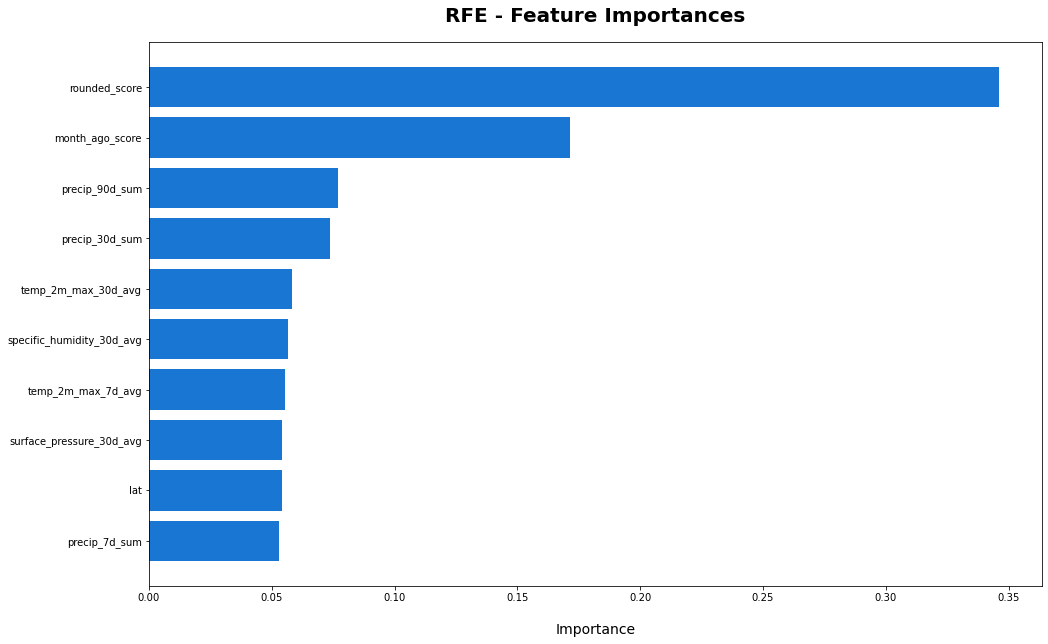

In [26]:
dset = pd.DataFrame()
dset['attr'] = new_columns
dset['importance'] = rfe.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending = True)

plt.figure(figsize = (16,10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFE - Feature Importances', fontsize = 20, fontweight='bold', pad =20)
plt.xlabel('Importance', fontsize = 14, labelpad = 20)
plt.show()

From this visualization we can see the 10 most important features in the dataset for predicting drought scores.

### 4c: Comparing Simplified Dataset Model with Baseline Model

In [27]:
X = wc_train_df[new_columns]
                     
y = wc_train_df[['month_ahead_score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluating model accuracy
print("west_cost_train_df accuracy:", accuracy_score(y_test, y_pred))

west_cost_train_df accuracy: 0.8664702994599902


In [28]:
X_test_df = wc_test_df[new_columns]
                     
y_test_df = wc_test_df[['month_ahead_score']]


y_pred = clf.predict(X_test_df)

#Evaluating model accuracy
print("west_cost_test_df accuracy:", accuracy_score(y_test_df, y_pred))

west_cost_test_df accuracy: 0.7097207303974221


By selecting for the most important features and using them in the test I was able to reduce overfitting and bring the test accuracy up.

### 4d: Previewing Model Performance on Full Dataset

In [29]:
X_full = train_df[new_columns]

y_full = train_df[['month_ahead_score']]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = .30)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Evaluating model accuracy
print("train_df accuracy:", accuracy_score(y_test, y_pred))

train_df accuracy: 0.8597334447849911


In [30]:
X_full_test = test_df[new_columns]
                     
y_full_test = test_df[['month_ahead_score']]

y_pred = clf.predict(X_full_test)

#Evaluating model accuracy
print("test_df accuracy:", accuracy_score(y_full_test, y_pred))

test_df accuracy: 0.7808765398051112


In [31]:
print(new_columns)

Index(['rounded_score', 'month_ago_score', 'precip_7d_sum', 'precip_30d_sum',
       'precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat'],
      dtype='object')


# #5: Saving Simplified Dataset 

In [ ]:
#Saving final west coast training dataframe
wc_train_df_final = wc_train_df[['fips','month_ahead_score','rounded_score', 'month_ago_score', 
       'precip_7d_sum', 'precip_30d_sum','precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat']]

wc_train_df_final.to_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'wc_train_df_final.csv')
                         
                         
#Saving final full training dataframe
train_df_final = train_df[['fips','month_ahead_score','rounded_score', 'month_ago_score', 
       'precip_7d_sum', 'precip_30d_sum','precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat']]

train_df_final.to_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'train_df_final.csv')



#Saving final west coast testing dataframe 
wc_test_df_final = wc_test_df[['fips','month_ahead_score','rounded_score', 'month_ago_score', 
       'precip_7d_sum', 'precip_30d_sum','precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat']]

wc_test_df_final.to_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'wc_test_df_final.csv')



#Saving final full testing dataframe
test_df_final = test_df[['fips','month_ahead_score','rounded_score', 'month_ago_score', 
       'precip_7d_sum', 'precip_30d_sum','precip_90d_sum', 'surface_pressure_30d_avg',
       'specific_humidity_30d_avg', 'temp_2m_max_7d_avg',
       'temp_2m_max_30d_avg', 'lat']]


test_df_final.to_csv(s + 'Users' + s + 'tylermeester' + s + 'GitHub' + s + 'raw_data' + s + 
                       'drought_prediction_data' + s + 'test_df_final.csv')